In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
import time

In [141]:
num_points = 400

imax = num_points
jmax = num_points
kmax = 1000
dt = 0.1

dr = 1./num_points

Let us create an interesting flow-field. It wil be similar to our experiment...

In [171]:
rot_speed1 = 0.01*dt
rot_speed2 = 0.01*dt
vortex1 = [imax/2, jmax/4]
vortex2 = [imax/2, 3*jmax/4]

In [172]:
v = np.zeros((imax, jmax), dtype=np.double) # right/left
u = np.zeros((imax, jmax), dtype=np.double) # down/up

In [173]:
xgrid = np.arange(0, imax)
ygrid = np.arange(0, jmax)

xmesh, ymesh = np.meshgrid(xgrid, ygrid)

In [174]:
v_field1 = -rot_speed1*(ymesh - vortex1[0])
u_field1 = rot_speed1*(xmesh - vortex1[1])

v_field2 = -rot_speed1*(ymesh - vortex2[0])
u_field2 = rot_speed1*(xmesh - vortex2[1])

v[:, 0:jmax/2] = v_field1[:, 0:jmax/2]
v[:, jmax/2:] = v_field2[:, jmax/2:]

u[:, 0:jmax/2] = u_field1[:, 0:jmax/2]
u[:, jmax/2:] = u_field2[:, jmax/2:]

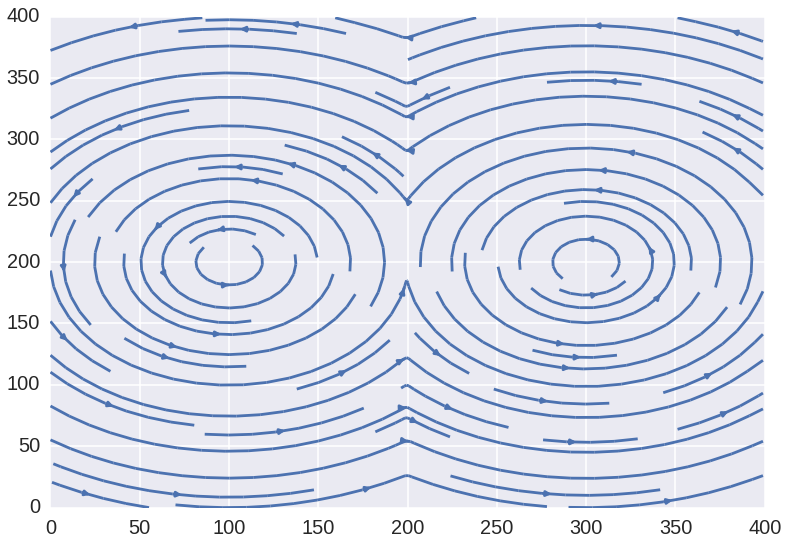

In [175]:
plt.streamplot(xmesh, ymesh, v, u)

Cool. Let's try this. The fluid should rotate every 10 iterations. We don't want the maximum speed to be greater than $dr/dt$...let's check that they are close at least.

In [178]:
dr/dt

0.024999999999999998

In [179]:
v_field1.max()

0.20000000000000001

We set the growth rate large and the diffusion constant small.

In [180]:
#fi_orig = np.zeros((imax, jmax), dtype=np.double)
#fi_orig[47:53, 47:53] = 0.1
fi_orig = None

D = (1*dr**2/dt)
s = 0.3

In [181]:
sol = Solver(imax=imax, jmax=jmax, kmax=kmax, dt=dt, use_morton=False, s=s,
            v=v, u=u, dr=dr, D=D, fi_orig = fi_orig)

Creating initial gaussian condition...
Done!
Creating advection operator...
Done!
Creating diffusion operator...
Done!


In [ ]:
result = sol.run()

I'm so confused. Why does this start sucking sometimes. I guess we'll figure out. Maybe it's exploding...I wish there was an intuitive explanation.

In [82]:
crap = np.where(result < 0)

In [83]:
ruh_roh_1 = crap[0]

Ok yeah there are problems lol.

In [84]:
ruh_rohs = np.where(result < 0)[0]

In [85]:
ruh_rohs

array([ 43,  44,  45, ..., 361, 362, 362])

In [86]:
result.min()

-1.3798993893702144e-152

Interesting. So instabilities are certainly growing...but not exploding...maybe it is an instability. Maybe I need more grid points???

 *Interesting.* The error always propagates from the top of the touched region...why?

That's interesting. The problem areas are on the left? Maybe I am doing something wrong the the indices...the errors propagate on the top. 

In [87]:
result[:, :, 100]

array([[  6.54291057e-191,   1.01858377e-191,   1.56984735e-192, ...,
          1.63321869e-188,   2.61987795e-189,   4.16096868e-190],
       [  7.30077408e-192,   1.13601985e-192,   1.74996592e-193, ...,
          1.82481900e-189,   2.92598472e-190,   4.64507742e-191],
       [  8.06411737e-193,   1.25416954e-193,   1.93096350e-194, ...,
          2.01842087e-190,   3.23497342e-191,   5.13322509e-192],
       ..., 
       [  4.43246850e-188,   6.90947797e-189,   1.06636134e-189, ...,
          1.10241066e-185,   1.77044012e-186,   2.81526810e-187],
       [  5.09796581e-189,   7.94353673e-190,   1.22541237e-190, ...,
          1.26938656e-186,   2.03785528e-187,   3.23925749e-188],
       [  5.80465093e-190,   9.04069561e-191,   1.39402552e-191, ...,
          1.44709894e-187,   2.32225897e-188,   3.68984191e-189]])

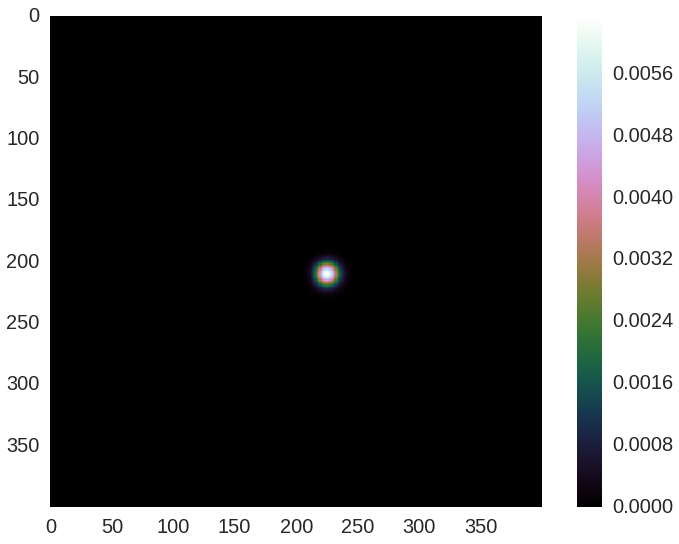

In [104]:
ski.io.imshow(result[:, :, 100])
plt.grid(False)

#plt.clim([0, 1])